# <font color='blue'>Data Science Academy</font>
# <font color='blue'>Análise Estatística Para Data Science com Linguagem Python</font>

## <font color='blue'>Lab 2</font>
#### <font color='blue'>Modelagem Estatística com Statsmodels e Modelagem Preditiva com Scikit-Learn Para Regressão em Linguagem Python</font>

![title](imagens/Lab2.png)

## Instalando e Carregando os Pacotes

In [3]:
# Versão da Linguagem Python
from platform import python_version
print('Versão da Linguagem Python Usada Neste Jupyter Notebook:', python_version())

Versão da Linguagem Python Usada Neste Jupyter Notebook: 3.9.18


In [4]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# !pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
#!pip install -q -U watermark

In [5]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
pd.options.mode.chained_assignment = None  
import warnings
warnings.filterwarnings("ignore")

In [6]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

Author: Data Science Academy

numpy      : 1.26.3
seaborn    : 0.13.2
matplotlib : 3.8.2
sklearn    : 1.3.2
pandas     : 2.1.4
statsmodels: 0.14.1



## Carregando os Dados

In [7]:
# Carregando os dados
dados = pd.read_csv('dados/dataset.csv')

In [8]:
# Shape
dados.shape

(2938, 22)

In [9]:
# Tipos de dados
dados.dtypes

Country                             object
Year                                 int64
Status                              object
Life expectancy                    float64
Adult Mortality                    float64
infant deaths                        int64
Alcohol                            float64
percentage expenditure             float64
Hepatitis B                        float64
Measles                              int64
 BMI                               float64
under-five deaths                    int64
Polio                              float64
Total expenditure                  float64
Diphtheria                         float64
 HIV/AIDS                          float64
GDP                                float64
 Population                        float64
 thinness  1-19 years              float64
 thinness 5-9 years                float64
Income composition of resources    float64
Schooling                          float64
dtype: object

In [10]:
# Amostra dos dados
dados.sample(10)

Country  Year      Status  Life expectancy   \
1038                            Greece  2003  Developing              79.1   
2071                             Qatar  2015  Developing              78.2   
1228        Iran (Islamic Republic of)  2005  Developing              72.0   
11                         Afghanistan  2004  Developing              57.0   
2019                              Peru  2003  Developing              72.1   
735   Democratic Republic of the Congo  2001  Developing              51.8   
2719                            Uganda  2010  Developing              58.4   
481                           Cameroon  2014  Developing              56.7   
2147                Russian Federation  2003  Developing              64.6   
807                              Egypt  2010  Developing              70.0   

      Adult Mortality  infant deaths  Alcohol  percentage expenditure  \
1038             81.0              0     9.46             2124.921517   
2071             68.0              0      NaN                0.000000   
1228            139.0             27     0.01                0.000000   
11              293.0             87     0.02               15.296066   
2019            152.0             15     4.50               34.703335   
735              34.0            227     1.90                0.000000   
2719            362.0             79    10.03              116.202964   
481             366.0             47     0.01               61.392636   
2147            322.0             20    11.32              333.214871   
807             173.0             54     0.22                0.000000   

      Hepatitis B  Measles   ...  Polio  Total expenditure  Diphtheria   \
1038         92.0         0  ...   93.0               8.61         94.0   
2071         99.0        18  ...   99.0                NaN         99.0   
1228         94.0         7  ...   95.0               6.60         95.0   
11           67.0       466  ...    5.0               8.79          5.0   
2019         65.0         0  ...   95.0               4.60         94.0   
735           NaN      8072  ...    3.0               2.67          3.0   
2719          8.0      1313  ...   79.0              11.20          8.0   
481          87.0       831  ...   86.0               4.10         87.0   
2147         94.0      3291  ...   97.0               5.61         96.0   
807          97.0        16  ...   97.0               4.80         97.0   

       HIV/AIDS           GDP   Population   thinness  1-19 years  \
1038        0.1  18477.578410      19287.0                    0.8   
2071        0.1  66346.522670          NaN                    5.2   
1228        0.1           NaN          NaN                    7.4   
11          0.1    219.141353   24118979.0                   19.5   
2019        0.4    218.259970   26937738.0                    1.3   
735         2.4           NaN          NaN                   12.2   
2719        8.0    594.997256   33915133.0                    6.0   
481         3.7   1441.141700    2223994.0                    5.7   
2147        0.4   2975.132778  144648257.0                    2.6   
807         0.1           NaN          NaN                    3.0   

       thinness 5-9 years  Income composition of resources  Schooling  
1038                  0.8                            0.823       15.2  
2071                  4.9                            0.855       13.4  
1228                  7.7                            0.687       11.4  
11                   19.7                            0.381        6.8  
2019                  1.3                            0.686       13.3  
735                  12.1                              NaN        NaN  
2719                  6.0                            0.473       10.9  
481                   5.7                            0.507       10.4  
2147                  2.8                            0.733       13.2  
807                   2.9                            0.665    

In [11]:
dados.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', ' Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [12]:
# Criando um novo dataset e ajustando o nome das variáveis
# Observe que estamos desconsiderando algumas variáveis:
# percentage expenditure, under-five deaths e Income composition of resources não estão sendo consideradas
# Essas variáveis não apresentam descrição clara na fonte de dados e por isso estão sendo removidas da análise
df = pd.DataFrame({'country': dados['Country'],
                   'life_expectancy': dados['Life expectancy '],
                   'year': dados['Year'],
                   'status': dados['Status'],
                   'adult_mortality': dados['Adult Mortality'],
                   'inf_death': dados['infant deaths'],
                   'alcohol': dados['Alcohol'],
                   'hepatitisB': dados['Hepatitis B'],
                   'measles': dados['Measles '],
                   'bmi': dados[' BMI '],
                   'polio': dados['Polio'],
                   'diphtheria': dados['Diphtheria '],
                   'hiv': dados[' HIV/AIDS'],
                   'gdp': dados['GDP'],
                   'total_expenditure': dados['Total expenditure'],
                   'thinness_till19': dados[' thinness  1-19 years'],
                   'thinness_till9': dados[' thinness 5-9 years'],
                   'school': dados['Schooling'],
                   'population': dados[' Population']
    
})

In [13]:
# Tipos de dados
df.dtypes

country               object
life_expectancy      float64
year                   int64
status                object
adult_mortality      float64
inf_death              int64
alcohol              float64
hepatitisB           float64
measles                int64
bmi                  float64
polio                float64
diphtheria           float64
hiv                  float64
gdp                  float64
total_expenditure    float64
thinness_till19      float64
thinness_till9       float64
school               float64
population           float64
dtype: object

In [14]:
# Shape
df.shape

(2938, 19)

In [15]:
# Dataset
df.head

<bound method NDFrame.head of           country  life_expectancy  year      status  adult_mortality  \
0     Afghanistan             65.0  2015  Developing            263.0   
1     Afghanistan             59.9  2014  Developing            271.0   
2     Afghanistan             59.9  2013  Developing            268.0   
3     Afghanistan             59.5  2012  Developing            272.0   
4     Afghanistan             59.2  2011  Developing            275.0   
...           ...              ...   ...         ...              ...   
2933     Zimbabwe             44.3  2004  Developing            723.0   
2934     Zimbabwe             44.5  2003  Developing            715.0   
2935     Zimbabwe             44.8  2002  Developing             73.0   
2936     Zimbabwe             45.3  2001  Developing            686.0   
2937     Zimbabwe             46.0  2000  Developing            665.0   

      inf_death  alcohol  hepatitisB  measles   bmi  polio  diphtheria   hiv  \
0            

## Análise Exploratória

<Axes: >

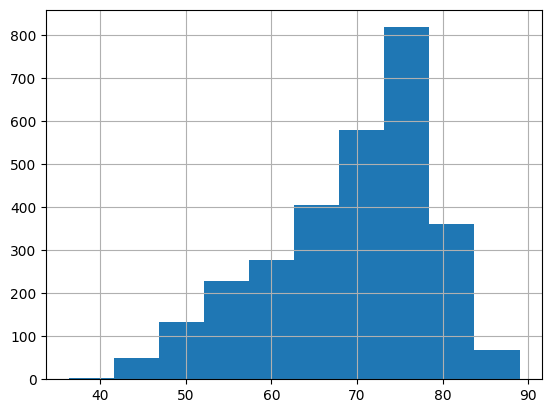

In [16]:
# Plot do histograma da variável alvo (variável quantitativa)
df['life_expectancy'].hist()

In [17]:
# Visualizando o total de linhas por coluna
df.count()

country              2938
life_expectancy      2928
year                 2938
status               2938
adult_mortality      2928
inf_death            2938
alcohol              2744
hepatitisB           2385
measles              2938
bmi                  2904
polio                2919
diphtheria           2919
hiv                  2938
gdp                  2490
total_expenditure    2712
thinness_till19      2904
thinness_till9       2904
school               2775
population           2286
dtype: int64

In [18]:
# Verificando valores ausentes
missing_values = df.isnull().sum().sort_values(ascending = False)
missing_values

population           652
hepatitisB           553
gdp                  448
total_expenditure    226
alcohol              194
school               163
thinness_till9        34
thinness_till19       34
bmi                   34
polio                 19
diphtheria            19
life_expectancy       10
adult_mortality       10
hiv                    0
measles                0
inf_death              0
status                 0
year                   0
country                0
dtype: int64

In [19]:
# Checando percentual de valores missing
missing_values = missing_values[missing_values > 0] / df.shape[0]
print(f"{missing_values * 100} %")

population           22.191967
hepatitisB           18.822328
gdp                  15.248468
total_expenditure     7.692308
alcohol               6.603131
school                5.547992
thinness_till9        1.157250
thinness_till19       1.157250
bmi                   1.157250
polio                 0.646698
diphtheria            0.646698
life_expectancy       0.340368
adult_mortality       0.340368
dtype: float64 %


## Data Munging

Normalmente quando temos 50% ou mais de valores ausentes apenas deletamos a variável. Menos de 50% idealmente aplicamos alguma estratégia de limpeza. Antes de decidir como tratar valores missing, vamos checar os outliers, pois assim podemos resolver dois problemas com uma única solução.

In [20]:
# Função para o plot da relação da variável alvo com alguns atributos
def get_pairs(data, alvo, atributos, n):
    
    # Grupos de linhas com 3 (n) gráficos por linha
    row_groups = [atributos[i:i+n] for i in range(0, len(atributos), n)]
    
    # Loop pelos grupos de linhas para criar cada pair plot
    for ind in row_groups:
        plot = sns.pairplot(x_vars = ind, y_vars = alvo, data = data, kind = "reg", height = 3)
        
    return

In [21]:
# Variável alvo
alvo = ['life_expectancy']

In [22]:
# Atributos com mais de 5% de valores missing
atributos = ['population', 'hepatitisB', 'gdp', 'total_expenditure', 'alcohol', 'school']

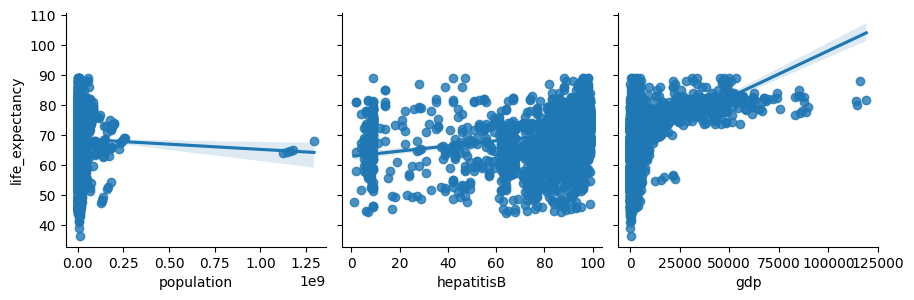

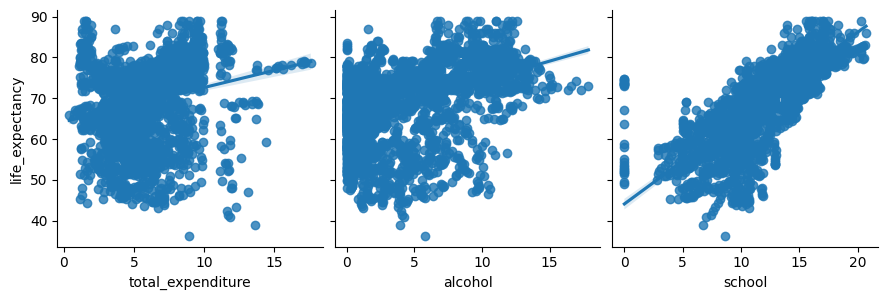

In [23]:
# Verificando outliers
get_pairs(df, alvo, atributos, 3)

In [24]:
# Valor máximo da população
df.population.max()

1293859294.0

In [25]:
# Checando os outliers
df[df.population > 1000000000].head()

country  life_expectancy  year      status  adult_mortality  inf_death  \
1187   India             68.0  2014  Developing            184.0        957   
1194   India             65.2  2007  Developing             26.0       1400   
1195   India             64.8  2006  Developing             28.0       1500   
1196   India             64.4  2005  Developing            211.0       1500   
1197   India             64.0  2004  Developing            214.0       1600   

      alcohol  hepatitisB  measles   bmi  polio  diphtheria  hiv          gdp  \
1187     3.07        79.0    79563  18.1   84.0        85.0  0.2  1573.118890   
1194     1.59         6.0    41144  14.4   67.0        64.0  0.3   118.166373   
1195     1.37         6.0    64185  13.9   66.0        65.0  0.3   792.259698   
1196     1.27         8.0    36711  13.5   65.0        65.0  0.3    77.819000   
1197     1.20         6.0    55443  13.0   58.0        63.0  0.3   621.318377   

      total_expenditure  thinness_till19  thinness_till9  school    population  
1187               4.69             26.8            27.4    11.6  1.293859e+09  
1194               4.23             27.1            28.0     9.9  1.179681e+09  
1195               4.25             27.1            28.0     9.7  1.161978e+09  
1196               4.28             27.2            28.1     9.4  1.144119e+09  
1197               4.22             27.2            28.2     9.2  1.126136e+09

In [26]:
# Removemos os outliers da variável population mantendo somente os registros que nos interessam
novo_df = df[df.population < 1000000000]

In [27]:
# Vamos manter somente registros com school > 0
novo_df = novo_df[novo_df.school > 0]

In [28]:
novo_df.shape

(2261, 19)

In [29]:
# Valor máximo da população
novo_df.population.max()

258162113.0

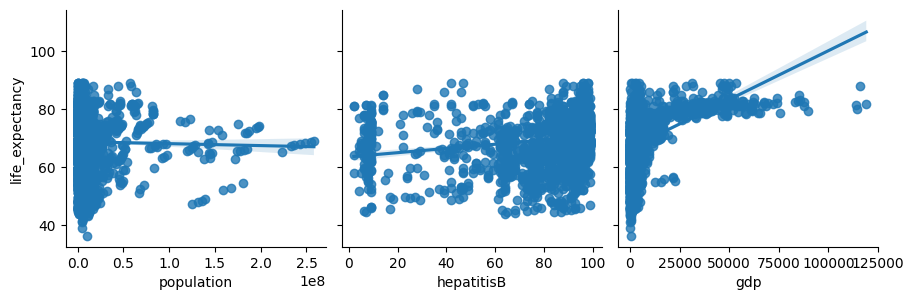

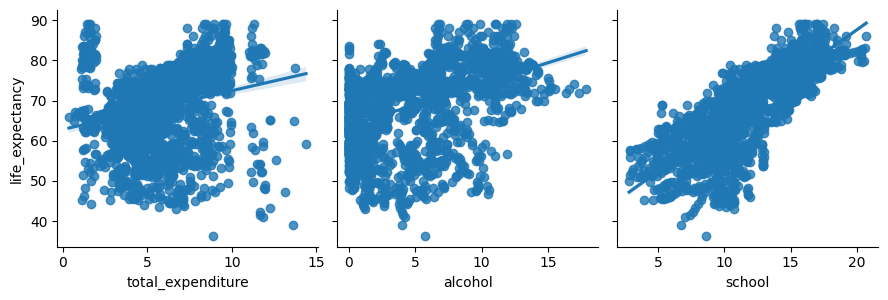

In [30]:
# Verificando outliers
get_pairs(novo_df, alvo, atributos, 3)

In [31]:
# Checando percentual de valores missing
missing_values = missing_values[missing_values > 0] / novo_df.shape[0]
print(f'{missing_values * 100} %' )

population           0.009815
hepatitisB           0.008325
gdp                  0.006744
total_expenditure    0.003402
alcohol              0.002920
school               0.002454
thinness_till9       0.000512
thinness_till19      0.000512
bmi                  0.000512
polio                0.000286
diphtheria           0.000286
life_expectancy      0.000151
adult_mortality      0.000151
dtype: float64 %


In [32]:
novo_df.describe()

life_expectancy         year  adult_mortality    inf_death  \
count      2260.000000  2261.000000      2260.000000  2261.000000   
mean         68.773540  2007.528527       169.313274    31.237948   
std           9.802588     4.602972       128.744704   115.487535   
min          36.300000  2000.000000         1.000000     0.000000   
25%          62.300000  2004.000000        72.000000     0.000000   
50%          71.400000  2008.000000       146.000000     3.000000   
75%          75.400000  2012.000000       235.000000    23.000000   
max          89.000000  2015.000000       723.000000  1800.000000   

           alcohol   hepatitisB        measles          bmi        polio  \
count  2116.000000  1798.000000    2261.000000  2240.000000  2258.000000   
mean      4.709234    79.320912    2454.226006    37.513929    81.228078   
std       4.052941    25.373491   11315.971518    19.891633    23.984650   
min       0.010000     2.000000       0.000000     1.400000     3.000000   
25%       0.950000    74.000000       0.000000    18.800000    75.000000   
50%       4.080000    89.000000      18.000000    42.150000    92.000000   
75%       7.560000    96.000000     441.000000    55.800000    96.000000   
max      17.870000    99.000000  212183.000000    83.300000    99.000000   

        diphtheria          hiv            gdp  total_expenditure  \
count  2258.000000  2261.000000    2247.000000        2117.000000   
mean     81.324624     2.058691    6670.640242           6.007643   
std      24.003757     5.674118   13578.657516           2.369427   
min       2.000000     0.100000       1.681350           0.370000   
25%      77.000000     0.100000     436.688545           4.380000   
50%      92.000000     0.100000    1526.877460           5.880000   
75%      96.000000     1.100000    5210.142342           7.700000   
max      99.000000    50.600000  119172.741800          14.390000   

       thinness_till19  thinness_till9       school    population  
count      2240.000000     2240.000000  2261.000000  2.261000e+03  
mean          4.833214        4.891830    11.970057  1.026072e+07  
std           4.556551        4.648014     3.274494  2.698889e+07  
min           0.100000        0.100000     2.800000  3.400000e+01  
25%           1.500000        1.500000    10.000000  1.967270e+05  
50%           2.900000        3.100000    12.200000  1.395398e+06  
75%           7.300000        7.400000    14.300000  7.395599e+06  
max          27.700000       28.600000    20.700000  2.581621e+08

In [33]:
# Função para o Replace das linhas vazias com a mediana
def impute_median(dados):
    return dados.fillna(dados.median())

In [34]:
# Removendo valores missing (observe as diferentes formas de notação do lado esquerdo do sinal de igual)
novo_df.loc[:, 'population'] = novo_df['population'].transform(impute_median)
novo_df.hepatitisB = novo_df['hepatitisB'].transform(impute_median)
novo_df.alcohol = novo_df['alcohol'].transform(impute_median)
novo_df.total_expenditure = novo_df['total_expenditure'].transform(impute_median)

In [35]:
# Checando percentual de valores missing
missing_values = missing_values[missing_values > 0] / novo_df.shape[0]
print(f'{missing_values * 100} %')

population           4.341049e-06
hepatitisB           3.681902e-06
gdp                  2.982807e-06
total_expenditure    1.504719e-06
alcohol              1.291662e-06
school               1.085262e-06
thinness_till9       2.263737e-07
thinness_till19      2.263737e-07
bmi                  2.263737e-07
polio                1.265030e-07
diphtheria           1.265030e-07
life_expectancy      6.658050e-08
adult_mortality      6.658050e-08
dtype: float64 %


In [36]:
# Remove registros com valores nulos
novo_df.dropna(inplace = True)

In [37]:
# Verifique se há valores ausentes
missing_values = novo_df.isnull().sum().sort_values(ascending = False)
missing_values

country              0
polio                0
school               0
thinness_till9       0
thinness_till19      0
total_expenditure    0
gdp                  0
hiv                  0
diphtheria           0
bmi                  0
life_expectancy      0
measles              0
hepatitisB           0
alcohol              0
inf_death            0
adult_mortality      0
status               0
year                 0
population           0
dtype: int64

In [38]:
# Shape
novo_df.shape

(2222, 19)

## Engenharia de Recursos (Feature Engineering)

> Como há diferença muito grande de população entre os países usar essa variável pode ser arriscado. Vamos criar uma nova variável e categorizar os países em uma de 3 faixas possíveis de população.

In [39]:
# Criamos os pontos de corte (cutoffs) para dividir a população em 3 categorias
IQR = [novo_df.population.quantile(0.33), novo_df.population.quantile(0.67)]

In [40]:
# Cria um novo recurso dividindo a população em 3 tamanhos
novo_df['pop_size'] = 1
novo_df.loc[(novo_df.population < IQR[1]) & (novo_df.population > IQR[0]), 'pop_size'] = 2
novo_df.loc[novo_df.population >= IQR[1], 'pop_size'] = 3

In [41]:
# Dataset
novo_df.head()

country  life_expectancy  year      status  adult_mortality  inf_death  \
0  Afghanistan             65.0  2015  Developing            263.0         62   
1  Afghanistan             59.9  2014  Developing            271.0         64   
2  Afghanistan             59.9  2013  Developing            268.0         66   
3  Afghanistan             59.5  2012  Developing            272.0         69   
4  Afghanistan             59.2  2011  Developing            275.0         71   

   alcohol  hepatitisB  measles   bmi  polio  diphtheria  hiv         gdp  \
0     0.01        65.0     1154  19.1    6.0        65.0  0.1  584.259210   
1     0.01        62.0      492  18.6   58.0        62.0  0.1  612.696514   
2     0.01        64.0      430  18.1   62.0        64.0  0.1  631.744976   
3     0.01        67.0     2787  17.6   67.0        67.0  0.1  669.959000   
4     0.01        68.0     3013  17.2   68.0        68.0  0.1   63.537231   

   total_expenditure  thinness_till19  thinness_till9  school  population  \
0               8.16             17.2            17.3    10.1  33736494.0   
1               8.18             17.5            17.5    10.0    327582.0   
2               8.13             17.7            17.7     9.9  31731688.0   
3               8.52             17.9            18.0     9.8   3696958.0   
4               7.87             18.2            18.2     9.5   2978599.0   

   pop_size  
0         3  
1         1  
2         3  
3         2  
4         2

> As variáveis alcohol e bmi têm uma relação direta e natural. Vamos criar uma nova variável chamada life_style com a combinação dessas duas variáveis.

In [42]:
# Criando a nova variável
novo_df['lifestyle'] = 0
novo_df.lifestyle = novo_df['bmi'] * novo_df['alcohol']

In [43]:
novo_df.head()

country  life_expectancy  year      status  adult_mortality  inf_death  \
0  Afghanistan             65.0  2015  Developing            263.0         62   
1  Afghanistan             59.9  2014  Developing            271.0         64   
2  Afghanistan             59.9  2013  Developing            268.0         66   
3  Afghanistan             59.5  2012  Developing            272.0         69   
4  Afghanistan             59.2  2011  Developing            275.0         71   

   alcohol  hepatitisB  measles   bmi  ...  diphtheria  hiv         gdp  \
0     0.01        65.0     1154  19.1  ...        65.0  0.1  584.259210   
1     0.01        62.0      492  18.6  ...        62.0  0.1  612.696514   
2     0.01        64.0      430  18.1  ...        64.0  0.1  631.744976   
3     0.01        67.0     2787  17.6  ...        67.0  0.1  669.959000   
4     0.01        68.0     3013  17.2  ...        68.0  0.1   63.537231   

   total_expenditure  thinness_till19  thinness_till9  school  population  \
0               8.16             17.2            17.3    10.1  33736494.0   
1               8.18             17.5            17.5    10.0    327582.0   
2               8.13             17.7            17.7     9.9  31731688.0   
3               8.52             17.9            18.0     9.8   3696958.0   
4               7.87             18.2            18.2     9.5   2978599.0   

   pop_size  lifestyle  
0         3      0.191  
1         1      0.186  
2         3      0.181  
3         2      0.176  
4         2      0.172  

[5 rows x 21 columns]

In [44]:
# Verifique se há valores ausentes
missing_values = novo_df.isnull().sum().sort_values(ascending = False)
missing_values

country              0
diphtheria           0
pop_size             0
population           0
school               0
thinness_till9       0
thinness_till19      0
total_expenditure    0
gdp                  0
hiv                  0
polio                0
life_expectancy      0
bmi                  0
measles              0
hepatitisB           0
alcohol              0
inf_death            0
adult_mortality      0
status               0
year                 0
lifestyle            0
dtype: int64

In [45]:
novo_df.dtypes

country               object
life_expectancy      float64
year                   int64
status                object
adult_mortality      float64
inf_death              int64
alcohol              float64
hepatitisB           float64
measles                int64
bmi                  float64
polio                float64
diphtheria           float64
hiv                  float64
gdp                  float64
total_expenditure    float64
thinness_till19      float64
thinness_till9       float64
school               float64
population           float64
pop_size               int64
lifestyle            float64
dtype: object

## Análise de Correlação Para Verificar Multicolinearidade

Queremos que as variáveis preditoras tenham uma alta correlação com a variável alvo, mas não queremos que as variáveis preditoras tenham alta correlação entre si. Se houver alta correlação entre as variáveis preditoras isso é chamado de multicolinearidade e fere uma das suposições da regressão.

A correlação é uma medida da relação entre as variáveis. O coeficiente de correlação é um valor de -1 a +1, sendo:

**-1 indica alta correlação negativa.**

**+1 indica ata correlação positiva.**

**0 indica que não há correlação.**

Correlação não implica causalidade. Por exemplo: Sempre que aumenta o consumo de sorvete aumenta a presença de tubarões na praia. Provavelmente ambos os eventos ocorrem no verão e estão correlacionados, mas isso não significa que um evento causa o outro. Para afirma isso teríamos que fazer uma análise de causalidade (o que será estudado neste curso).

In [46]:
# Correlação das variáveis numéricas no conjunto de dados
novo_df.loc[:, list(novo_df.columns[1:3]) + list(novo_df.columns[4:])].corr()

life_expectancy      year  adult_mortality  inf_death  \
life_expectancy           1.000000  0.176117        -0.675711  -0.188937   
year                      0.176117  1.000000        -0.074519  -0.042089   
adult_mortality          -0.675711 -0.074519         1.000000   0.068450   
inf_death                -0.188937 -0.042089         0.068450   1.000000   
alcohol                   0.417684 -0.070014        -0.212432  -0.111326   
hepatitisB                0.145320  0.025485        -0.090739  -0.122679   
measles                  -0.138672 -0.104324         0.002966   0.492842   
bmi                       0.591826  0.095873        -0.379885  -0.232869   
polio                     0.439880  0.089729        -0.232471  -0.168426   
diphtheria                0.461301  0.138480        -0.230656  -0.172427   
hiv                      -0.570218 -0.153504         0.537801   0.017758   
gdp                       0.464855  0.089318        -0.284487  -0.107413   
total_expenditure         0.223801  0.058259        -0.121580  -0.151023   
thinness_till19          -0.494762 -0.052084         0.313513   0.445476   
thinness_till9           -0.487918 -0.056654         0.320073   0.450111   
school                    0.787895  0.203825        -0.448258  -0.227441   
population               -0.018328  0.040187        -0.002467   0.332226   
pop_size                 -0.072341  0.033903         0.091056   0.161808   
lifestyle                 0.524638 -0.028838        -0.297620  -0.160287   

                    alcohol  hepatitisB   measles       bmi     polio  \
life_expectancy    0.417684    0.145320 -0.138672  0.591826  0.439880   
year              -0.070014    0.025485 -0.104324  0.095873  0.089729   
adult_mortality   -0.212432   -0.090739  0.002966 -0.379885 -0.232471   
inf_death         -0.111326   -0.122679  0.492842 -0.232869 -0.168426   
alcohol            1.000000    0.105768 -0.031832  0.384038  0.245070   
hepatitisB         0.105768    1.000000 -0.053466  0.105644  0.363550   
measles           -0.031832   -0.053466  1.000000 -0.164890 -0.113775   
bmi                0.384038    0.105644 -0.164890  1.000000  0.277083   
polio              0.245070    0.363550 -0.113775  0.277083  1.000000   
diphtheria         0.250085    0.457382 -0.118252  0.279748  0.675514   
hiv               -0.055847   -0.080330  0.026085 -0.244071 -0.150137   
gdp                0.444414    0.058189 -0.068761  0.307833  0.196704   
total_expenditure  0.258454    0.097827 -0.105133  0.232984  0.166099   
thinness_till19   -0.416774   -0.076983  0.198874 -0.561643 -0.223685   
thinness_till9    -0.406877   -0.081630  0.193109 -0.569161 -0.225501   
school             0.598579    0.151423 -0.153803  0.604893  0.435264   
population        -0.007516   -0.052076  0.166975 -0.053069 -0.037620   
pop_size           0.012318   -0.037878  0.056582 -0.045490 -0.034486   
lifestyle          0.873168    0.116639 -0.101495  0.670402  0.282803   

                   diphtheria       hiv       gdp  total_expenditure  \
life_expectancy      0.461301 -0.570218  0.464855           0.223801   
year                 0.138480 -0.153504  0.089318           0.058259   
adult_mortality     -0.230656  0.537801 -0.284487          -0.121580   
inf_death           -0.172427  0.017758 -0.107413          -0.151023   
alcohol              0.250085 -0.055847  0.444414           0.258454   
hepatitisB           0.457382 -0.080330  0.058189           0.097827   
measles             -0.118252  0.026085 -0.068761          -0.105133   
bmi                  0.279748 -0.244071  0.307833           0.232984   
polio                0.675514 -0.150137  0.196704           0.166099   
diphtheria           1.000000 -0.160103  0.193807           0.177380   
hiv                 -0.160103  1.000000 -0.131684           0.007335   
gdp                  0.193807 -0.131684  1.000000           0.233021   
total_expenditure    0.177380  0.007335  0.233021           1.000000   
thinness_till19     -0.239140

Observe a primeira linha da tabela com a correlação de cada variável com a variável alvo (life_expectancy). Buscamos pelas maiores correlações (positivas ou negativas). Vamos considerar 0.30 como nossa marca de corte. Para facilitar a nossa vida vamos filtrar a tabela de correlação.

In [47]:
# Filtrando a matriz de correlação
dfCorr = novo_df.loc[:, list(novo_df.columns[1:3]) + list(novo_df.columns[4:])].corr()
df_filtro_1 = dfCorr[((dfCorr >= .3) | (dfCorr <= -.3)) & (dfCorr !=1.000)]
df_filtro_1

life_expectancy  year  adult_mortality  inf_death  \
life_expectancy                NaN   NaN        -0.675711        NaN   
year                           NaN   NaN              NaN        NaN   
adult_mortality          -0.675711   NaN              NaN        NaN   
inf_death                      NaN   NaN              NaN        NaN   
alcohol                   0.417684   NaN              NaN        NaN   
hepatitisB                     NaN   NaN              NaN        NaN   
measles                        NaN   NaN              NaN   0.492842   
bmi                       0.591826   NaN        -0.379885        NaN   
polio                     0.439880   NaN              NaN        NaN   
diphtheria                0.461301   NaN              NaN        NaN   
hiv                      -0.570218   NaN         0.537801        NaN   
gdp                       0.464855   NaN              NaN        NaN   
total_expenditure              NaN   NaN              NaN        NaN   
thinness_till19          -0.494762   NaN         0.313513   0.445476   
thinness_till9           -0.487918   NaN         0.320073   0.450111   
school                    0.787895   NaN        -0.448258        NaN   
population                     NaN   NaN              NaN   0.332226   
pop_size                       NaN   NaN              NaN        NaN   
lifestyle                 0.524638   NaN              NaN        NaN   

                    alcohol  hepatitisB   measles       bmi     polio  \
life_expectancy    0.417684         NaN       NaN  0.591826  0.439880   
year                    NaN         NaN       NaN       NaN       NaN   
adult_mortality         NaN         NaN       NaN -0.379885       NaN   
inf_death               NaN         NaN  0.492842       NaN       NaN   
alcohol                 NaN         NaN       NaN  0.384038       NaN   
hepatitisB              NaN         NaN       NaN       NaN  0.363550   
measles                 NaN         NaN       NaN       NaN       NaN   
bmi                0.384038         NaN       NaN       NaN       NaN   
polio                   NaN    0.363550       NaN       NaN       NaN   
diphtheria              NaN    0.457382       NaN       NaN  0.675514   
hiv                     NaN         NaN       NaN       NaN       NaN   
gdp                0.444414         NaN       NaN  0.307833       NaN   
total_expenditure       NaN         NaN       NaN       NaN       NaN   
thinness_till19   -0.416774         NaN       NaN -0.561643       NaN   
thinness_till9    -0.406877         NaN       NaN -0.569161       NaN   
school             0.598579         NaN       NaN  0.604893  0.435264   
population              NaN         NaN       NaN       NaN       NaN   
pop_size                NaN         NaN       NaN       NaN       NaN   
lifestyle          0.873168         NaN       NaN  0.670402       NaN   

                   diphtheria       hiv       gdp  total_expenditure  \
life_expectancy      0.461301 -0.570218  0.464855                NaN   
year                      NaN       NaN       NaN                NaN   
adult_mortality           NaN  0.537801       NaN                NaN   
inf_death                 NaN       NaN       NaN                NaN   
alcohol                   NaN       NaN  0.444414                NaN   
hepatitisB           0.457382       NaN       NaN                NaN   
measles                   NaN       NaN       NaN                NaN   
bmi                       NaN       NaN  0.307833                NaN   
polio                0.675514       NaN       NaN                NaN   
diphtheria                NaN       NaN       NaN                NaN   
hiv                       NaN       NaN       NaN                NaN   
gdp                       NaN       NaN       NaN                NaN   
total_expenditure         NaN       NaN       NaN                NaN   
thinness_till19           NaN       NaN -0.311480                NaN   
thinness_till9            NaN       N

As variáveis adult_mortality, alcohol, bmi, polio, diphtheria, hiv, gdp, thinness_till19, thinness_till9, school e lifestyle atendem ao nosso critério.

Agora devemos checar uma das suposições da Regressão Linear e identificar possíveis problemas de multicolinearidade (alta correlação entre as variáveis preditoras). Com base nesse critério eliminamos uma de duas variáveis preditoras altamente correlacionadas. Vamos considerar 0.65 como marca de corte. Vamos filtrar mais uma vez a matriz de correlação.

In [48]:
# Filtrando a matriz de correlação
dfCorr = novo_df.loc[:, list(novo_df.columns[1:3]) + list(novo_df.columns[4:])].corr()
df_filtro_2 = dfCorr[((dfCorr >= .65) | (dfCorr <= -.65)) & (dfCorr != 1.000)]
df_filtro_2 = df_filtro_2.drop('life_expectancy', axis = 1)
df_filtro_2 = df_filtro_2.drop('life_expectancy', axis = 0)
df_filtro_2

year  adult_mortality  inf_death   alcohol  hepatitisB  \
year                NaN              NaN        NaN       NaN         NaN   
adult_mortality     NaN              NaN        NaN       NaN         NaN   
inf_death           NaN              NaN        NaN       NaN         NaN   
alcohol             NaN              NaN        NaN       NaN         NaN   
hepatitisB          NaN              NaN        NaN       NaN         NaN   
measles             NaN              NaN        NaN       NaN         NaN   
bmi                 NaN              NaN        NaN       NaN         NaN   
polio               NaN              NaN        NaN       NaN         NaN   
diphtheria          NaN              NaN        NaN       NaN         NaN   
hiv                 NaN              NaN        NaN       NaN         NaN   
gdp                 NaN              NaN        NaN       NaN         NaN   
total_expenditure   NaN              NaN        NaN       NaN         NaN   
thinness_till19     NaN              NaN        NaN       NaN         NaN   
thinness_till9      NaN              NaN        NaN       NaN         NaN   
school              NaN              NaN        NaN       NaN         NaN   
population          NaN              NaN        NaN       NaN         NaN   
pop_size            NaN              NaN        NaN       NaN         NaN   
lifestyle           NaN              NaN        NaN  0.873168         NaN   

                   measles       bmi     polio  diphtheria  hiv  gdp  \
year                   NaN       NaN       NaN         NaN  NaN  NaN   
adult_mortality        NaN       NaN       NaN         NaN  NaN  NaN   
inf_death              NaN       NaN       NaN         NaN  NaN  NaN   
alcohol                NaN       NaN       NaN         NaN  NaN  NaN   
hepatitisB             NaN       NaN       NaN         NaN  NaN  NaN   
measles                NaN       NaN       NaN         NaN  NaN  NaN   
bmi                    NaN       NaN       NaN         NaN  NaN  NaN   
polio                  NaN       NaN       NaN    0.675514  NaN  NaN   
diphtheria             NaN       NaN  0.675514         NaN  NaN  NaN   
hiv                    NaN       NaN       NaN         NaN  NaN  NaN   
gdp                    NaN       NaN       NaN         NaN  NaN  NaN   
total_expenditure      NaN       NaN       NaN         NaN  NaN  NaN   
thinness_till19        NaN       NaN       NaN         NaN  NaN  NaN   
thinness_till9         NaN       NaN       NaN         NaN  NaN  NaN   
school                 NaN       NaN       NaN         NaN  NaN  NaN   
population             NaN       NaN       NaN         NaN  NaN  NaN   
pop_size               NaN       NaN       NaN         NaN  NaN  NaN   
lifestyle              NaN  0.670402       NaN         NaN  NaN  NaN   

                   total_expenditure  thinness_till19  thinness_till9  school  \
year                             NaN              NaN             NaN     NaN   
adult_mortality                  NaN              NaN             NaN     NaN   
inf_death                        NaN              NaN             NaN     NaN   
alcohol                          NaN              NaN             NaN     NaN   
hepatitisB                       NaN              NaN             NaN     NaN   
measles                          NaN              NaN             NaN     NaN   
bmi                              NaN              NaN             NaN     NaN   
polio                            NaN              NaN             NaN     NaN   
diphtheria                       NaN              NaN             NaN     NaN   
hiv                              NaN              NaN             NaN     NaN   
gdp                              NaN              NaN             NaN     NaN   
total_expenditure                NaN              NaN             NaN     NaN   
thinness_till19                  NaN              NaN        0.927597     NaN   
thinness_till9                   NaN         0.92759

As variáveis adult_mortality, diphtheria, hiv, gdp, thinness_till19, school e lifestyle atendem ao nosso critério. Vamos criar o dataset final com essas variáveis.

Se preferir visualizar as correlações de forma gráfica, aqui está um exemplo de Pair Plot.

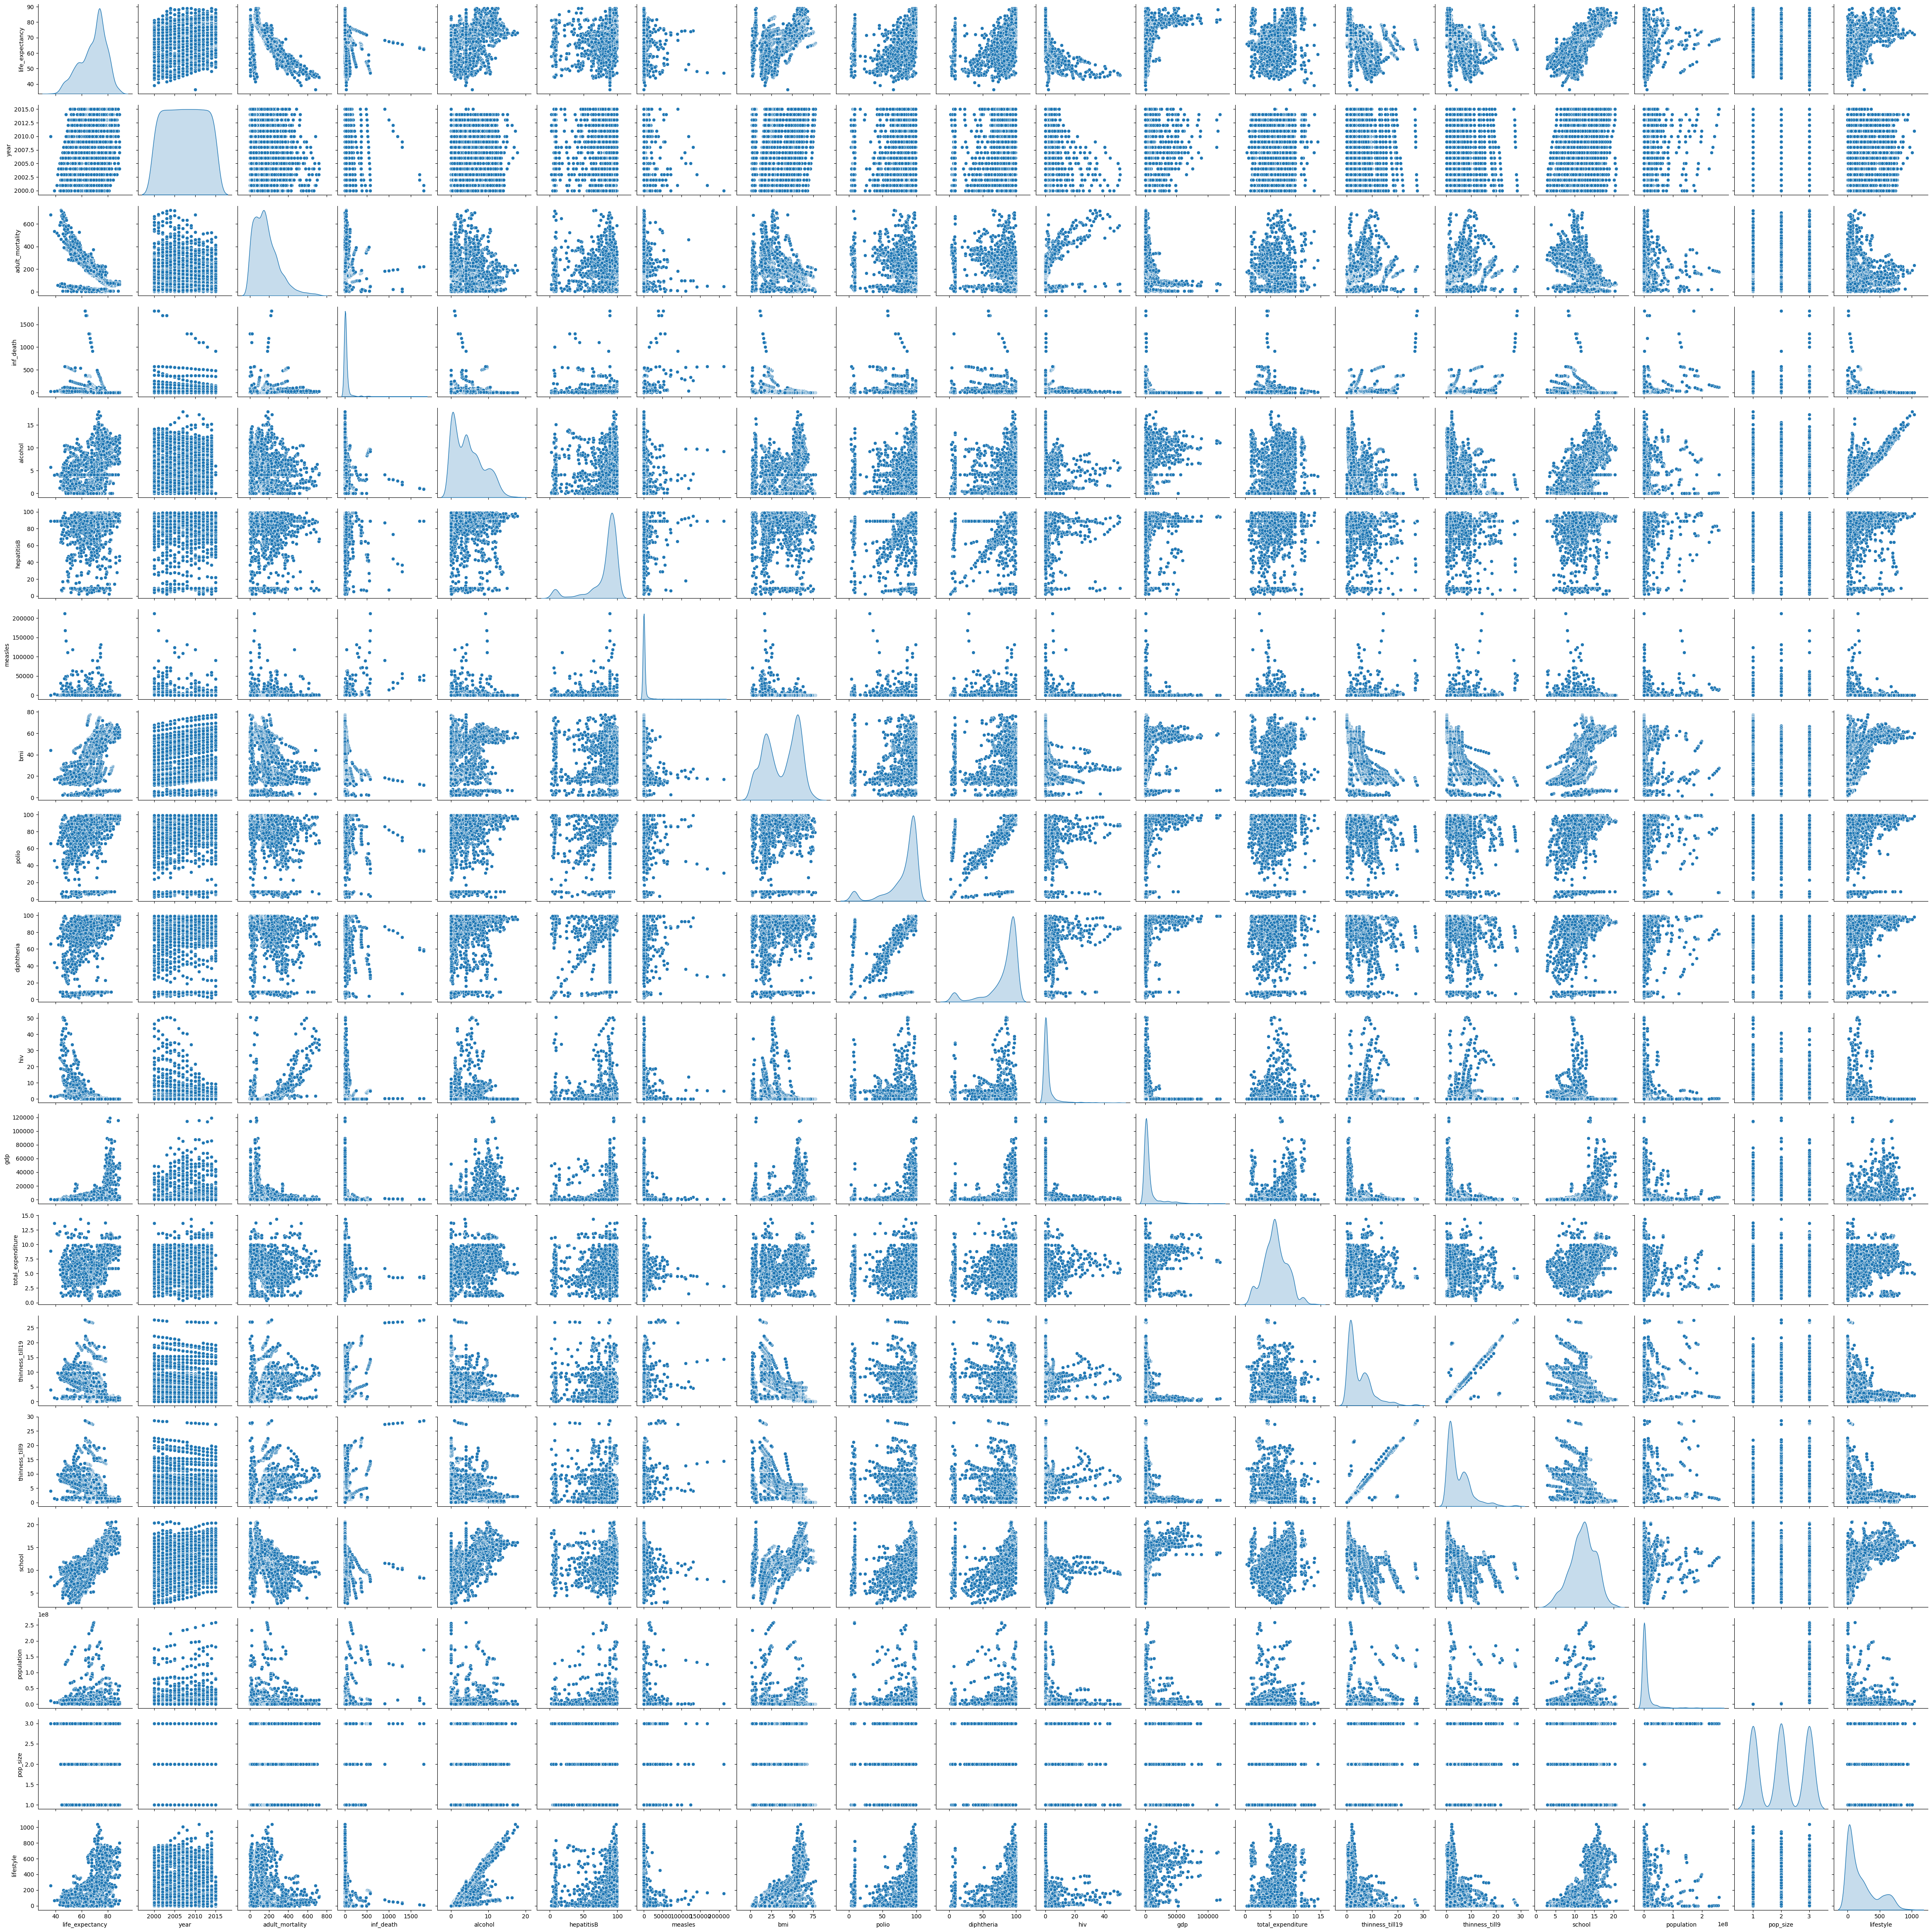

In [49]:
# Checando a correlação entre as variáveis
sns.pairplot(novo_df, diag_kind = 'kde', height = 2.5)

> As variáveis adult_mortality, diphtheria, hiv, gdp, thinness_till19, school e lifestyle atendem ao nosso critério.

In [50]:
# Preparando o novo dataset
novo_df_final = pd.DataFrame({'life_expectancy': novo_df['life_expectancy'],
                              'adult_mortality': novo_df['adult_mortality'],
                              'diphtheria': novo_df['diphtheria'],
                              'hiv': novo_df['hiv'],
                              'gdp': novo_df['gdp'],
                              'thinness_till19': novo_df['thinness_till19'],
                              'school': novo_df['school'],
                              'lifestyle': novo_df['lifestyle'],
                            })

In [51]:
novo_df_final.head()

life_expectancy  adult_mortality  diphtheria  hiv         gdp  \
0             65.0            263.0        65.0  0.1  584.259210   
1             59.9            271.0        62.0  0.1  612.696514   
2             59.9            268.0        64.0  0.1  631.744976   
3             59.5            272.0        67.0  0.1  669.959000   
4             59.2            275.0        68.0  0.1   63.537231   

   thinness_till19  school  lifestyle  
0             17.2    10.1      0.191  
1             17.5    10.0      0.186  
2             17.7     9.9      0.181  
3             17.9     9.8      0.176  
4             18.2     9.5      0.172

In [52]:
# Verifique se há valores ausentes
missing_values = novo_df_final.isnull().sum().sort_values(ascending = False)
missing_values

life_expectancy    0
adult_mortality    0
diphtheria         0
hiv                0
gdp                0
thinness_till19    0
school             0
lifestyle          0
dtype: int64

In [53]:
# Visualizando o total de linhas por coluna
novo_df_final.count()

life_expectancy    2222
adult_mortality    2222
diphtheria         2222
hiv                2222
gdp                2222
thinness_till19    2222
school             2222
lifestyle          2222
dtype: int64

In [54]:
# Checando multicolinearidade e removendo varáveis altamente correlacionadas

corr_map = novo_df_final.corr()
corr_map

life_expectancy  adult_mortality  diphtheria       hiv  \
life_expectancy         1.000000        -0.675711    0.461301 -0.570218   
adult_mortality        -0.675711         1.000000   -0.230656  0.537801   
diphtheria              0.461301        -0.230656    1.000000 -0.160103   
hiv                    -0.570218         0.537801   -0.160103  1.000000   
gdp                     0.464855        -0.284487    0.193807 -0.131684   
thinness_till19        -0.494762         0.313513   -0.239140  0.212936   
school                  0.787895        -0.448258    0.452468 -0.239688   
lifestyle               0.524638        -0.297620    0.288499 -0.155901   

                      gdp  thinness_till19    school  lifestyle  
life_expectancy  0.464855        -0.494762  0.787895   0.524638  
adult_mortality -0.284487         0.313513 -0.448258  -0.297620  
diphtheria       0.193807        -0.239140  0.452468   0.288499  
hiv             -0.131684         0.212936 -0.239688  -0.155901  
gdp              1.000000        -0.311480  0.494044   0.466371  
thinness_till19 -0.311480         1.000000 -0.516931  -0.473522  
school           0.494044        -0.516931  1.000000   0.645893  
lifestyle        0.466371        -0.473522  0.645893   1.000000

In [55]:
# Função para o plot da matriz de correlação
def CorrMat(df, dropDuplicates = True, xrot = 70, yrot = 0, label = 'Variable'):
    
    # Excluir correlações duplicadas mascarando os valores superiores à direita
    if dropDuplicates:
        mask = np.zeros_like(df, dtype = bool)
        mask[np.triu_indices_from(mask)] = True
           
    # Definir cor do plano de fundo / estilo do gráfico
    sns.set_style(style = 'dark')
    fig, ax = plt.subplots(figsize = (14, 12))
    
    # Adiciona mapa de cores do vermelho ao azul
    plt.title("Matriz de Correlação")

    # Desenha gráfico de correlação com ou sem duplicatas
    if dropDuplicates:
        sns.heatmap(df, mask = mask, square = True, linewidth = 5, cbar_kws = {"shrink": .5}, ax = ax)
        plt.xlabel(label)
        plt.ylabel(label)
        plt.xticks(rotation=xrot)
        plt.yticks(rotation=yrot)
        
    else:
        sns.heatmap(df, square = True, linewidth = 5, cbar_kws = {"shrink": .5}, ax = ax)
        plt.xlabel(label)
        plt.ylabel(label)
        plt.xticks(rotation=xrot)
        plt.yticks(rotation=yrot)
    return

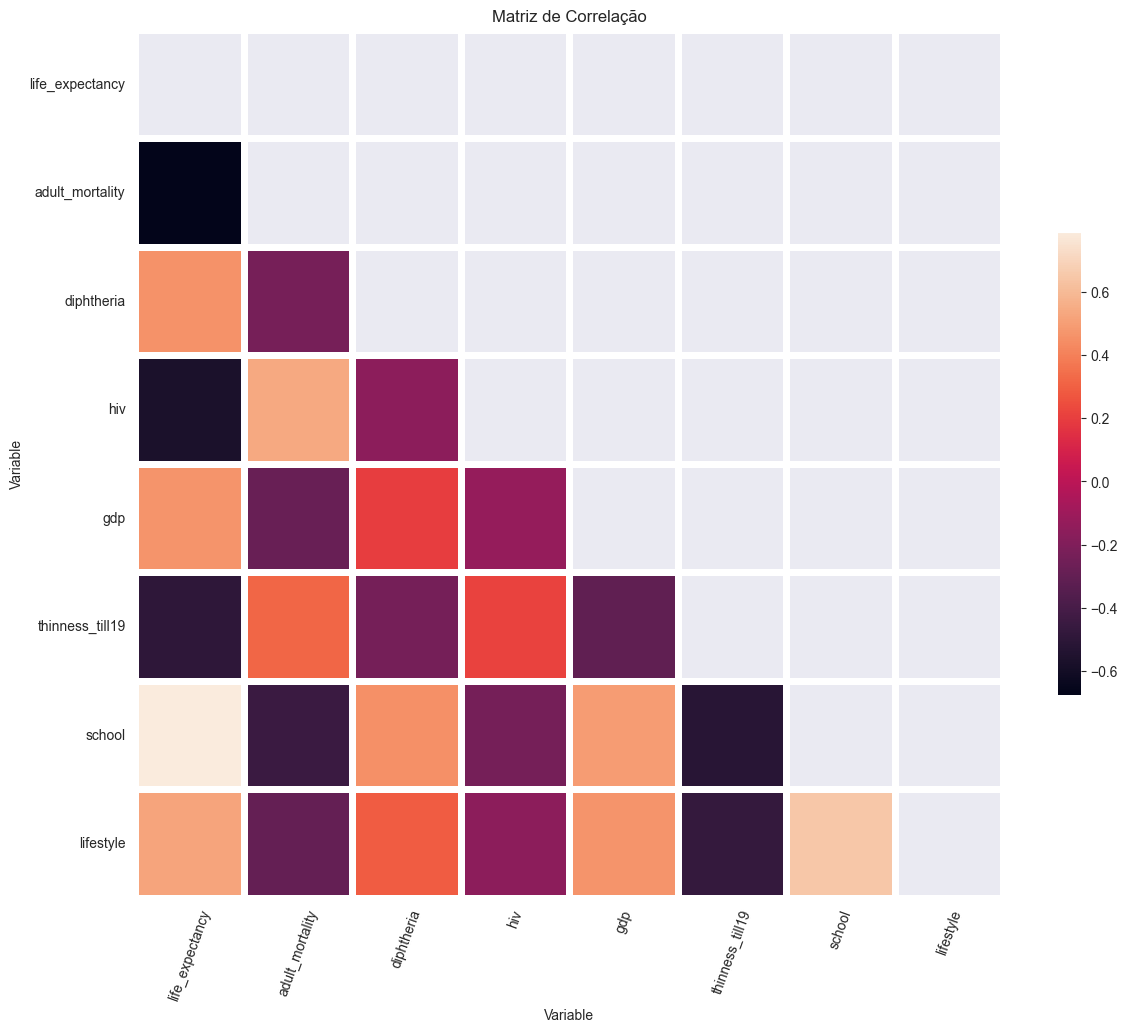

In [56]:
# Plot da matriz de correlação
CorrMat(corr_map)

In [57]:
# Dataset
novo_df_final.head()

life_expectancy  adult_mortality  diphtheria  hiv         gdp  \
0             65.0            263.0        65.0  0.1  584.259210   
1             59.9            271.0        62.0  0.1  612.696514   
2             59.9            268.0        64.0  0.1  631.744976   
3             59.5            272.0        67.0  0.1  669.959000   
4             59.2            275.0        68.0  0.1   63.537231   

   thinness_till19  school  lifestyle  
0             17.2    10.1      0.191  
1             17.5    10.0      0.186  
2             17.7     9.9      0.181  
3             17.9     9.8      0.176  
4             18.2     9.5      0.172

In [58]:
# Dataset
novo_df_final.dtypes

life_expectancy    float64
adult_mortality    float64
diphtheria         float64
hiv                float64
gdp                float64
thinness_till19    float64
school             float64
lifestyle          float64
dtype: object

In [59]:
novo_df_final.shape

(2222, 8)

### Modelagem Estatística

In [60]:
# Primeira versão do modelo de regressão
formula = 'life_expectancy ~ adult_mortality + diphtheria + hiv + gdp + thinness_till19 + school + lifestyle'
modelo_v1 = ols(formula, data = novo_df_final).fit()
modelo_v1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     1512.
Date:                Fri, 01 Mar 2024   Prob (F-statistic):               0.00
Time:                        09:26:53   Log-Likelihood:                -6283.5
No. Observations:                2222   AIC:                         1.258e+04
Df Residuals:                    2214   BIC:                         1.263e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          51.0797      0.566     90.285      0.000      49.970      52.189
adult_mortality    -0.0179      0.001    -20.496      0.000      -0.020      -0.016
diphtheria          0.0444      0.004     10.819      0.000       0.036       0.053
hiv                -0.4911      0.018    -27.123      0.000      -0.527      -0.456
gdp              5.578e-05   7.56e-06      7.383      0.000     4.1e-05    7.06e-05
thinness_till19    -0.1150      0.023     -5.012      0.000      -0.160      -0.070
school              1.5319      0.042     36.282      0.000       1.449       1.615
lifestyle          -0.0004      0.001     -0.695      0.487      -0.001       0.001
==============================================================================
Omnibus:                      125.254   Durbin-Watson:                   0.585
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              223.628
Skew:                          -0.424   Prob(JB):                     2.75e-49
Kurtosis:                       4.302   Cond. No.                     9.91e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.91e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

> A variiável lifestyle apresenta um valor-p superior a 0.05 e, portanto, não é significativamente estatística para prever a variável alvo. Vamos removê-la.

In [61]:
# Segunda versão do modelo de regressão
formula = 'life_expectancy ~ adult_mortality + diphtheria + hiv + gdp + thinness_till19 + school'
modelo_v2 = ols(formula, data = novo_df_final).fit()
modelo_v2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     1764.
Date:                Fri, 01 Mar 2024   Prob (F-statistic):               0.00
Time:                        09:26:53   Log-Likelihood:                -6283.7
No. Observations:                2222   AIC:                         1.258e+04
Df Residuals:                    2215   BIC:                         1.262e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          51.1441      0.558     91.649      0.000      50.050      52.238
adult_mortality    -0.0179      0.001    -20.514      0.000      -0.020      -0.016
diphtheria          0.0444      0.004     10.819      0.000       0.036       0.052
hiv                -0.4913      0.018    -27.137      0.000      -0.527      -0.456
gdp              5.467e-05   7.38e-06      7.404      0.000    4.02e-05    6.91e-05
thinness_till19    -0.1118      0.022     -4.976      0.000      -0.156      -0.068
school              1.5198      0.038     39.489      0.000       1.444       1.595
==============================================================================
Omnibus:                      126.492   Durbin-Watson:                   0.584
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              225.186
Skew:                          -0.429   Prob(JB):                     1.26e-49
Kurtosis:                       4.303   Cond. No.                     9.78e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.78e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

> Observe a nota 2 acima. Parace haver multicolinearidade nos preditores. Podemos voltar e rever nosso critério de decisão e remover variáveis que estejam com correlação acima de 0.55, por exemplo. Mas antes disso, vamos padronizar os dados e colocar tudo na mesma escala e avaliar o resultado.

In [84]:
# Aplicando escala aos dados
atributos = ['adult_mortality', 'diphtheria', 'hiv', 'gdp', 'thinness_till19', 'school']

# Escala
scaler = StandardScaler()
scaler.fit(novo_df_final[atributos])
scaled_features = scaler.transform(novo_df_final[atributos])

# Criando um dataframe com dados em escala
scaled_features_df = pd.DataFrame(scaled_features, columns = atributos, index = novo_df_final.index)
scaled_features_df.head()

adult_mortality  diphtheria       hiv       gdp  thinness_till19    school
0         0.732306   -0.699291 -0.346871 -0.450787         2.708739 -0.596552
1         0.794280   -0.825348 -0.346871 -0.448702         2.774420 -0.627375
2         0.771040   -0.741310 -0.346871 -0.447305         2.818208 -0.658198
3         0.802027   -0.615253 -0.346871 -0.444503         2.861995 -0.689021
4         0.825268   -0.573234 -0.346871 -0.488966         2.927676 -0.781490

In [85]:
# Terceira versão do modelo
modelo_v3 = sm.OLS(endog = novo_df_final['life_expectancy'], exog = sm.add_constant(scaled_features_df)).fit()
modelo_v3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     1764.
Date:                Fri, 01 Mar 2024   Prob (F-statistic):               0.00
Time:                        09:40:30   Log-Likelihood:                -6283.7
No. Observations:                2222   AIC:                         1.258e+04
Df Residuals:                    2215   BIC:                         1.262e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              68.8544      0.087    791.929      0.000      68.684      69.025
adult_mortality    -2.3098      0.113    -20.514      0.000      -2.531      -2.089
diphtheria          1.0575      0.098     10.819      0.000       0.866       1.249
hiv                -2.8087      0.104    -27.137      0.000      -3.012      -2.606
gdp                 0.7456      0.101      7.404      0.000       0.548       0.943
thinness_till19    -0.5105      0.103     -4.976      0.000      -0.712      -0.309
school              4.9308      0.125     39.489      0.000       4.686       5.176
==============================================================================
Omnibus:                      126.492   Durbin-Watson:                   0.584
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              225.186
Skew:                          -0.429   Prob(JB):                     1.26e-49
Kurtosis:                       4.303   Cond. No.                         2.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> A padronização e escala dados nos ajudou a construir um modelo melhor. Vamos agora usar modelagem preditiva e construir a versão final do nosso modelo. 

## Modelagem Preditiva

In [93]:
novo_df_final.head(2)

life_expectancy  adult_mortality  diphtheria  hiv         gdp  \
0             65.0            263.0        65.0  0.1  584.259210   
1             59.9            271.0        62.0  0.1  612.696514   

   thinness_till19  school  lifestyle  
0             17.2    10.1      0.191  
1             17.5    10.0      0.186

In [94]:
# Remove a coluna lifestyle
novo_df_final = novo_df_final.drop('lifestyle', axis = 1)

In [95]:
novo_df_final.head(2)

life_expectancy  adult_mortality  diphtheria  hiv         gdp  \
0             65.0            263.0        65.0  0.1  584.259210   
1             59.9            271.0        62.0  0.1  612.696514   

   thinness_till19  school  
0             17.2    10.1  
1             17.5    10.0

In [96]:
# Split dos dados em X e Y
X = novo_df_final[['adult_mortality', 'diphtheria', 'hiv', 'gdp', 'thinness_till19', 'school']].values
y = novo_df_final.life_expectancy.values.reshape(-1,1)

In [97]:
# Split em treino e teste
x_treino, x_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [98]:
len(x_treino)

1777

In [99]:
len(y_treino)

1777

In [100]:
len(x_teste)

445

In [101]:
len(y_teste)

445

In [67]:
# Escala nos dados de treino. Fazemos o Fit somente com dados de treino!!!
scaler = StandardScaler()
scaler.fit(x_treino)

In [103]:
# Aplicamos o scaler nos dados de treino e teste
x_treino_scaled = scaler.transform(x_treino)
x_teste_scaled = scaler.transform(x_teste)

In [104]:
x_treino_scaled

array([[-0.5614151 ,  0.72935846, -0.346871  , -0.26233663,  0.34421112,
         0.01990588],
       [ 0.18228062,  0.05705293, -0.29439875, -0.48509932, -0.5753274 ,
        -0.59655227],
       [-0.28252921,  0.51926298, -0.346871  , -0.25765384, -0.61911495,
         0.0815517 ],
       ...,
       [-0.77057953,  0.56128208, -0.346871  , -0.1422288 , -0.81615892,
         1.53022835],
       [ 1.15063442, -1.03544356,  0.09039773, -0.47187176,  0.93534303,
        -1.5212395 ],
       [-0.19731407,  0.72935846, -0.346871  , -0.0037627 , -0.53153985,
         1.06788474]])

In [105]:
x_treino_scaled.shape

(1777, 6)

In [106]:
x_teste_scaled.shape

(445, 6)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [107]:
# Cria o modelo
modelo_lr_v1 = LinearRegression()

In [108]:
# Treinamento do modelo
modelo_lr_v1.fit(x_treino_scaled, y_treino)

LinearRegression()

In [109]:
# O que o modelo aprendeu:
print("Coeficientes: \n", modelo_lr_v1.coef_)

Coeficientes: 
 [[-2.3806151   1.06865398 -2.80521477  0.68989588 -0.4079591   5.08329639]]


In [110]:
# Previsões com dados de treino
y_pred_treino = modelo_lr_v1.predict(x_treino_scaled)

In [111]:
# Print das métricas em treino
print('Mean Absolute Error:', metrics.mean_absolute_percentage_error(y_treino, y_pred_treino))
print('Mean Squared Error:', metrics.mean_squared_error(y_treino, y_pred_treino))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_treino, y_pred_treino)))
print('R2 Score:', metrics.r2_score(y_treino, y_pred_treino))


Mean Absolute Error: 0.04860189953827813
Mean Squared Error: 16.798649509251447
Root Mean Squared Error: 4.098615560070431
R2 Score: 0.8305630982987356


## Avaliação do Modelo

Podemos calcular as métricas com os dados de treino como fizemos anteriormente, mas a avaliação do modelo sempre deve ser feita com dados que o modelo ainda não viu, dados de teste.

In [112]:
# Previsões com dados de teste sem padronização (errado)
y_pred_teste = modelo_lr_v1.predict(x_teste)

In [113]:
# Dataframe com as previsões e valores reais
df_previsoes = pd.DataFrame({'Valor_Real': y_teste.flatten(), 'Valor_Previsto': y_pred_teste.flatten()})
df_previsoes.head()

Valor_Real  Valor_Previsto
0        75.7     2786.206765
1        82.5    46893.175921
2        74.3     2414.206225
3        73.9     4325.290827
4        74.1      271.247969

In [114]:
# Previsões com dados de teste com padronização (correto)
y_pred_teste = modelo_lr_v1.predict(x_teste_scaled)

In [115]:
# Dataframe com as previsões e valores reais
df_previsoes = pd.DataFrame({'Valor_Real': y_teste.flatten(), 'Valor_Previsto': y_pred_teste.flatten()})
df_previsoes.head()

Valor_Real  Valor_Previsto
0        75.7       72.308742
1        82.5       88.615654
2        74.3       71.006647
3        73.9       72.102339
4        74.1       71.555806

In [116]:
# Função para criar gráfico de dispersão
def cria_scatter(x, y, title, xlabel, ylabel):
        
    # Figura e subplots
    fig, ax = plt.subplots(figsize = (10, 6))
    
    # Scatter
    ax.scatter(x, y, color = "green", alpha = 0.3)

    # Labels
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    return

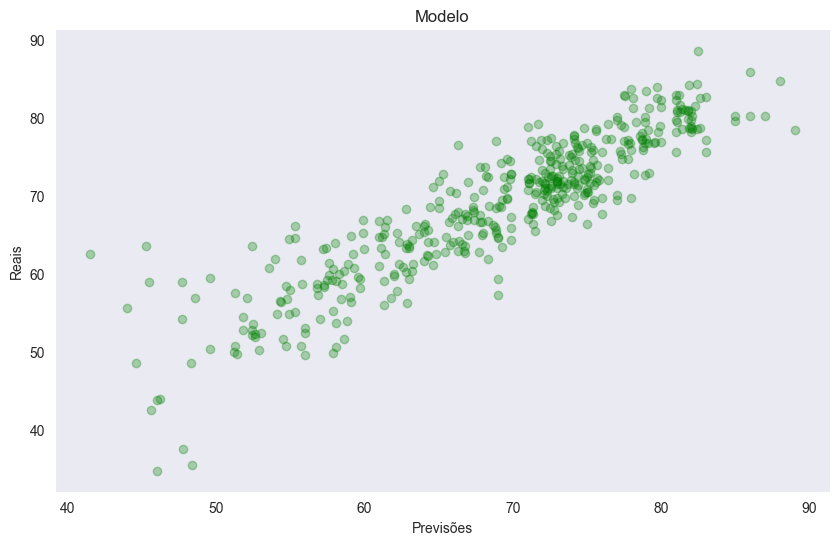

In [117]:
# Plot das previsões
cria_scatter(df_previsoes.Valor_Real, df_previsoes.Valor_Previsto, 'Modelo', 'Previsões', 'Reais')

> Na análise exploratória no início do Lab vimos que a maioria dos dados tinha exptectativa de vida entre 70 e 80 anos, extamente onde a performance do modelo foi melhor (porque havia mais dados de exemplo).

In [118]:
# Print das métricas com dados de teste
print('Mean Absolute Error:', metrics.mean_absolute_percentage_error(y_teste, y_pred_teste))
print('Mean Squared Error:', metrics.mean_squared_error(y_teste, y_pred_teste))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_teste, y_pred_teste)))
print('R2 Score:', metrics.r2_score(y_teste, y_pred_teste))


Mean Absolute Error: 0.047293276297189435
Mean Squared Error: 16.654288288391555
Root Mean Squared Error: 4.080966587512272
R2 Score: 0.8090460243016726


"Erro médio quadrático" (MSE) é talvez a métrica mais popular usada para problemas de regressão. Essencialmente, encontra o erro quadrado médio entre os valores previstos e reais.

Temos um modelo de regressão que prevê a expectativa de vida (definido como ŷᵢ) e temos ainda a expectativa de vida real (indicada com y). Então o MSE pode ser calculado como:

<img src="imagens/mse.png" alt="Drawing" style="width: 400px;"/>

Às vezes, usamos o RMSE para ter uma métrica com escala como os valores-alvo, que é essencialmente a raiz quadrada do MSE.

O erro absoluto médio (ou desvio absoluto médio) é outra métrica que encontra a distância absoluta média entre os valores previsto e alvo. O MAE é definido como abaixo:

<img src="imagens/mae.png" alt="Drawing" style="width: 400px;"/>

O R2 é o coeficiente de determinação, sendo calculado pela fórmula abaixo:

<img src="imagens/rsquared.png" alt="Drawing" style="width: 400px;"/>

## Previsão com Novos Dados

In [119]:
# Carregando os novos dados
novos_dados = pd.read_csv('dados/novos_dados.csv')

In [120]:
novos_dados

adult_mortality  diphtheria  hiv  gdp  thinness_till19  school
0              252          63  0.1  690             18.3     9.8

In [121]:
# Os novos dados precisam ser padronizados
novos_dados_scaled = scaler.transform(novos_dados)

In [122]:
novos_dados_scaled

array([[ 0.64709045, -0.78332898, -0.346871  , -0.44303395,  2.94957027,
        -0.68902099]])

In [123]:
# Previsão
previsao = modelo_lr_v1.predict(novos_dados_scaled)

In [124]:
print('Esse país teria cidadãos com uma expectativa de vida (em anos) de aproximadamente:', previsao)

Esse país teria cidadãos com uma expectativa de vida (em anos) de aproximadamente: [[62.40911806]]


# Fim